In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.flush_and_unmount()

Mounted at /content/gdrive


In [5]:
root_path = 'gdrive/My Drive/NLP2_Project/'

# **Part One**

> **Project Objective:** To build a text classification model that 
analyses the customer's sentiments based on their reviews in the IMDB database.

In [18]:
from keras.datasets import imdb
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 1. Importing and analyzing the data set.
> - <i>Getting the train and test set<br>
> - Taking 10000 most frequent words</i>



In [19]:
vocab_size = 10000 #vocabulary size

In [20]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

> -  <i>Printing the shape of features and labels<br>
-  Printing value of any one feature and it's label</i>

In [21]:
print("Training Feature shape: ", X_train.shape)
print("Training Label shape: ", y_train.shape)
print("-"*100)
print("Test Feature shape: ", X_test.shape)
print("Test Label shape: ", y_test.shape)
print("-"*100)
print("Maximum value of a word index: ", max([max(sequence) for sequence in X_train]))
print("Maximum length num words of review in train: ", max([len(sequence) for sequence in X_train]))
print("Number of words: ",len(np.unique(np.hstack(X_train))) + len(np.unique(np.hstack(X_test))))

Training Feature shape:  (25000,)
Training Label shape:  (25000,)
----------------------------------------------------------------------------------------------------
Test Feature shape:  (25000,)
Test Label shape:  (25000,)
----------------------------------------------------------------------------------------------------
Maximum value of a word index:  9999
Maximum length num words of review in train:  2494
Number of words:  19949


In [27]:
print('Maximum review length: {}'.format(len(max((X_train + X_test), key=len))))
print("-"*30)
print('Minimum review length: {}'.format(len(min((X_test + X_test), key=len))))

Maximum review length: 2697
------------------------------
Minimum review length: 14


In [24]:
np.unique(y_train)

array([0, 1])

In [31]:
print("Value of Feature:",X_train[911])

Value of Feature: [1, 160, 777, 22, 39, 6, 704, 121, 688, 8, 2740, 7, 2, 39, 2, 2, 47, 57, 712, 11, 1855, 4387, 875, 551, 2, 304, 6, 275, 1483, 14, 58, 187, 19, 6, 3890, 7, 2954, 212, 5, 35, 3308, 701, 1624, 177, 137, 131, 397, 638, 27, 749, 7, 51, 29, 1085, 17, 112, 2, 355, 19, 27, 704, 29, 127, 38, 209, 4, 359, 7, 6, 1185, 769, 12, 9, 6, 1123, 193, 23, 6, 704, 11, 843, 94, 84, 15, 4, 7246, 3895, 2724, 359, 4, 833, 2240, 9, 12, 528, 30, 626, 2, 4, 2, 7214, 7246, 1372, 2, 15, 14, 478, 22, 3011, 9, 64, 1112, 9469, 88, 29, 9, 173, 7, 6, 4564, 3573, 8, 9343, 98, 103, 1790, 56, 8446, 2634, 5, 149, 4, 2, 2719, 5, 6100, 2, 120, 4, 236, 2476, 153, 29, 287, 87, 9856, 11, 6211, 8, 276, 27, 157, 46, 50, 4, 1882, 3301, 34, 1205, 33, 4, 779, 182, 3647, 2, 66, 2, 25, 8, 4, 1494, 4, 192, 29, 324, 12, 23, 2, 9, 480, 17, 91, 62, 64, 589, 14, 1187, 772, 6, 3536, 2718, 12, 272, 777, 27, 2, 11, 64, 772, 701, 1624, 156, 82, 66, 495, 11, 14, 22, 478, 354, 32, 2161, 103, 149, 111, 108, 800, 4, 712, 4794, 47

In [33]:
print("Value of Label: ",y_train[911])

Value of Label:  1


> - <i>Decoding the feature value to get original sentence.</i>

In [11]:
# Load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decode the review, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[911]])

1654784/1641221 [==============================] - 0s 0us/step


In [12]:
decoded_review

"? another fantastic film from a country where due to decades of ? from ? ? has no problems in creating passionate subject matter ? takes a different approach this time around with a blend of ironic comedy and an endearing non professional cast while still getting across his message of what he sees as being ? wrong with his country he does so without the need of a heavy storyline it is a positive take on a country in particular its people that the iranian population desperately need the greatest pity is it won't be released ? the ? paranoid iranian government ? that this fine film maker is only successful overseas because he is part of a global conspiracy to embarrass them after growing up amid revolution and watching the ? artists and educated ? over the last 25 years he shows great bravery in continuing to put his work out there the realism achieved by shooting at the actual world cup ? really ? you to the event the fact he shot it on ? is amazing as most would only attempt this proj

> - <i>Performing relevant sequence adding on the data</i>



In [35]:
maxlen = 500  #number of word used from each review
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test =  pad_sequences(X_test, maxlen=maxlen)

In [36]:
print("Shape of X_train after sequence padding: ",X_train.shape)
print("Shape of y_train after sequence padding: ",y_train.shape)

Shape of X_train after sequence padding:  (25000, 500)
Shape of y_train after sequence padding:  (25000,)


> - <i>Designing, training, tuning and testing a sequential model to analyze the customer's sentiments based on their reviews.</i>

In [ ]:
embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=164, validation_data=(X_test, y_test))

Epoch 1/5
153/153 [==============================] - 300s 2s/step - loss: 0.1453 - accuracy: 0.9493 - val_loss: 0.3459 - val_accuracy: 0.8719
Epoch 2/5
153/153 [==============================] - 302s 2s/step - loss: 0.1082 - accuracy: 0.9648 - val_loss: 0.3552 - val_accuracy: 0.8682
Epoch 3/5
153/153 [==============================] - 300s 2s/step - loss: 0.0921 - accuracy: 0.9710 - val_loss: 0.4074 - val_accuracy: 0.8656
Epoch 4/5
153/153 [==============================] - 303s 2s/step - loss: 0.0773 - accuracy: 0.9770 - val_loss: 0.4582 - val_accuracy: 0.8554
Epoch 5/5
153/153 [==============================] - 301s 2s/step - loss: 0.0596 - accuracy: 0.9824 - val_loss: 0.4690 - val_accuracy: 0.8590


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Train Accuracy: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))

Train Accuracy: 46.90%
Test Accuracy: 85.90%


In [44]:
def plot_learningCurve(history, epochs):
    # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

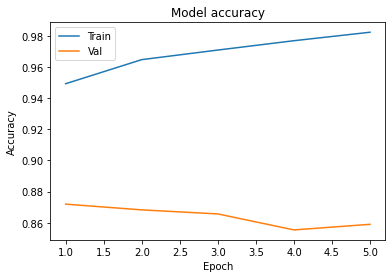

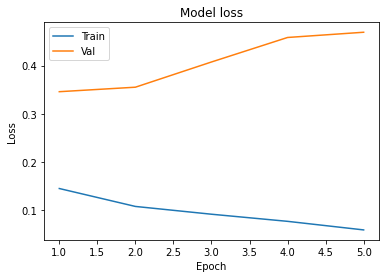

In [ ]:
plot_learningCurve(history, 5)

> - <i>Using the designed model to print the prediction on any one sample</i>

In [ ]:
y_pred = np.argmax(model.predict_classes(pad_sequences(X_test, maxlen = maxlen)), axis= -1)

In [ ]:
target_names = ['Sentiment_Positive', 'Sentiment_Negative']

y_pred = np.round(y_pred, 0)
y_pred = y_pred.ravel()
y_pred = y_pred.astype('int64')
y_test = y_test.ravel()

print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

Sentiment_Positive       0.50      1.00      0.67     12500
Sentiment_Negative       0.00      0.00      0.00     12500

          accuracy                           0.50     25000
         macro avg       0.25      0.50      0.33     25000
      weighted avg       0.25      0.50      0.33     25000



In [37]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[3]])     #Predicting for X_train[3]

In [ ]:
decoded_review

"events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our protagonist introduces himself to us and also introduces the story that stretches back through generations it produces stories within stories stories that evoke the ? wonder of scotland its rugged mountains ? in ? the stuff of legend yet ? is ? in real

In [ ]:
print("Actual Value: ", y_test[3])
print("Predicted Value: ", y_pred[3])

Actual Value:  0
Predicted Value:  0


# **Part Two**

> **Project Objective:**  To build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from nltk.tokenize import WhitespaceTokenizer
from zipfile import ZipFile
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

> - <i>Reading and exploring the data</i>

In [8]:
sdata = pd.read_json("/content/gdrive/MyDrive/NLP2_Project/Sarcasm_Headlines_Dataset.json",lines=True)

In [9]:
sdata.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [10]:
sdata['headline'][1]

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

In [11]:
sdata.shape

(26709, 3)

In [12]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [13]:
sdata.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [14]:
sdata.describe(include='object')

,article_link,headline
count,26709,26709
unique,26708,26602
top,https://www.huffingtonpost.comhttp://nymag.com...,sunday roundup
freq,2,10


In [15]:
sdata['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

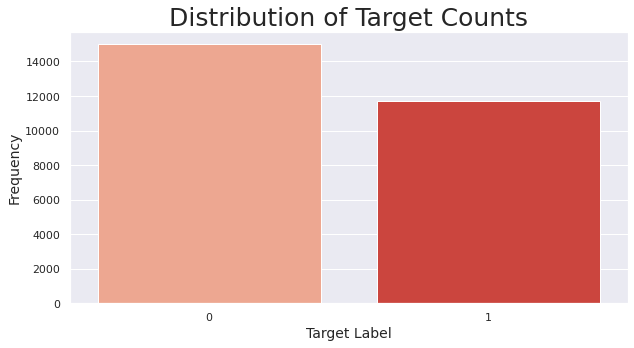

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(sdata.is_sarcastic, palette='Reds')
plt.title("Distribution of Target Counts", size=25)
plt.xlabel("Target Label", size=14)
plt.ylabel("Frequency", size=14)
plt.show()

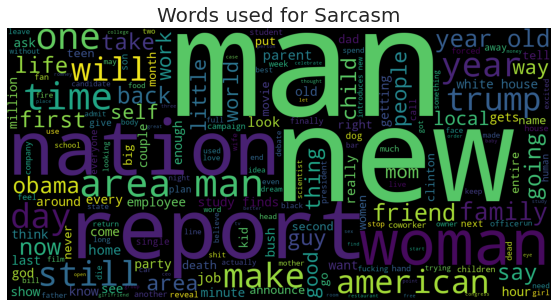

In [17]:
all_keywords = " ".join(line for line in sdata[sdata.is_sarcastic==1].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, random_state=42).generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.title("Words used for Sarcasm", size=20)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

As seen in WordCloud that for headlines with sarcasm consists of words like 'man', 'new', 'nation', 'woman' and 'report' are used often.

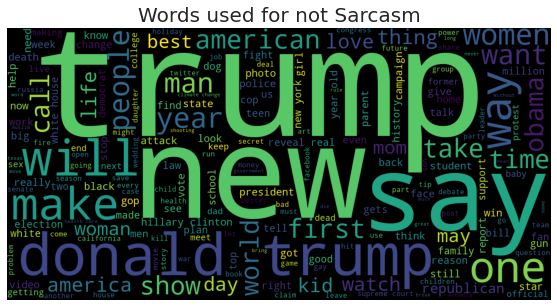

In [18]:
all_keywords = " ".join(line for line in sdata[sdata.is_sarcastic==0].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, random_state=42).generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.title("Words used for not Sarcasm", size=20)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

As seen in WordCloud that for headlines with sarcasm consists of words like 'Donald trump', 'new', 'will', 'make', 'say' and more.

In [19]:
stopwords = set(stopwords.words('english'))
def cleanData(text):
    text = re.sub(r'\d+', '', text)
    text = "".join([char for char in text if char not in string.punctuation])
    return text

sdata['headline']=sdata['headline'].apply(cleanData)

In [20]:
sdata['headline'][1]

'the roseanne revival catches up to our thorny political mood for better and worse'

> - <i> Retaining the relevant columns</i>

In [21]:
sdata.drop('article_link',inplace=True,axis=1)

> - <i>Getting the length of each sentence</i>

In [22]:
length = []
for review in sdata.headline:
    length.append([review,len(review.split())])

In [23]:
length[911]

['changing weather inspires area conversationalist', 5]

In [24]:
length[14]

['barcelona holds huge protest in support of refugees', 8]

As observed above each review has different lengths. Hence, we need to pad all these sentences using the maximum length.

In [25]:
max_length = max([len(headline.split()) for headline in sdata['headline']])
print('Maximum Length of sentence: ', max_length)

Maximum Length of sentence:  38


> - <i>Defining parameters</i>

In [26]:
max_features = 10000
maxlen = max([len(text) for text in sdata['headline']])
vocab_size = 10000
embedding_dim = 16

> - <i>Getting the indices for words</i>

In [27]:
indices = []
for text in sdata['headline']:
    span_generator = WhitespaceTokenizer().span_tokenize(text)
    spans = [span for span in span_generator]
    indices.append(spans)

#Displaying indices of 1 review
print(sdata['headline'][0])
print(indices[0])

former versace store clerk sues over secret black code for minority shoppers
[(0, 6), (7, 14), (15, 20), (21, 26), (27, 31), (32, 36), (37, 43), (44, 49), (50, 54), (55, 58), (59, 67), (68, 76)]


> - <i> Creating features and labels</i>

In [28]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(sdata['headline'])

In [29]:
X = tokenizer.texts_to_sequences(sdata['headline'])
X = pad_sequences(X, maxlen = maxlen)     #Features
y = np.asarray(sdata['is_sarcastic'])     #Labels

print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))

Number of Samples: 26709
Number of Labels:  26709


> - <i>Getting vocabulary size </i>

In [30]:
num_words=len(tokenizer.word_index)
print (num_words)

27667


> - <i>Creating a weight matrix using GloVe embeddings</i>

In [31]:
glove_file = '/content/gdrive/MyDrive/NLP2_Project/glove.6B.zip'

In [32]:
#Extract Glove embedding zip file

with ZipFile(glove_file, 'r') as z:
    z.extractall() 

In [33]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [34]:
embedding_matrix = np.zeros((num_words, 200))

for i, word in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [35]:
embedding_matrix.shape

(27667, 200)

> - <i>Defining and compiling a Bidirectional LSTM model.</i>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 240, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 240, 128)          41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 246,913
Trainable params: 246,913
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="adam", loss = tf.keras.losses.binary_crossentropy, metrics = ["accuracy"])

In [40]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

> - <i>Fitting the model and checking the validation accuracy</i>

In [41]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=256, epochs = 10, callbacks=[early_stop])

Epoch 1/10
84/84 [==============================] - 18s 79ms/step - loss: 0.5865 - accuracy: 0.6687 - val_loss: 0.3962 - val_accuracy: 0.8240
Epoch 2/10
84/84 [==============================] - 5s 63ms/step - loss: 0.3142 - accuracy: 0.8720 - val_loss: 0.3436 - val_accuracy: 0.8542
Epoch 3/10
84/84 [==============================] - 5s 62ms/step - loss: 0.2119 - accuracy: 0.9189 - val_loss: 0.3412 - val_accuracy: 0.8531
Epoch 4/10
84/84 [==============================] - 5s 63ms/step - loss: 0.1578 - accuracy: 0.9440 - val_loss: 0.4044 - val_accuracy: 0.8454
Epoch 5/10
84/84 [==============================] - 5s 62ms/step - loss: 0.1230 - accuracy: 0.9586 - val_loss: 0.4450 - val_accuracy: 0.8399
Epoch 6/10
84/84 [==============================] - 5s 63ms/step - loss: 0.1007 - accuracy: 0.9676 - val_loss: 0.4973 - val_accuracy: 0.8424
Epoch 7/10
84/84 [==============================] - 5s 63ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.5780 - val_accuracy: 0.8422
Epoch 8/10
8

In [47]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

Validation Accuracy: 83.23%
